In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [16]:
df = pd.read_csv("bikes.csv")
df.head(5)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


## General graph

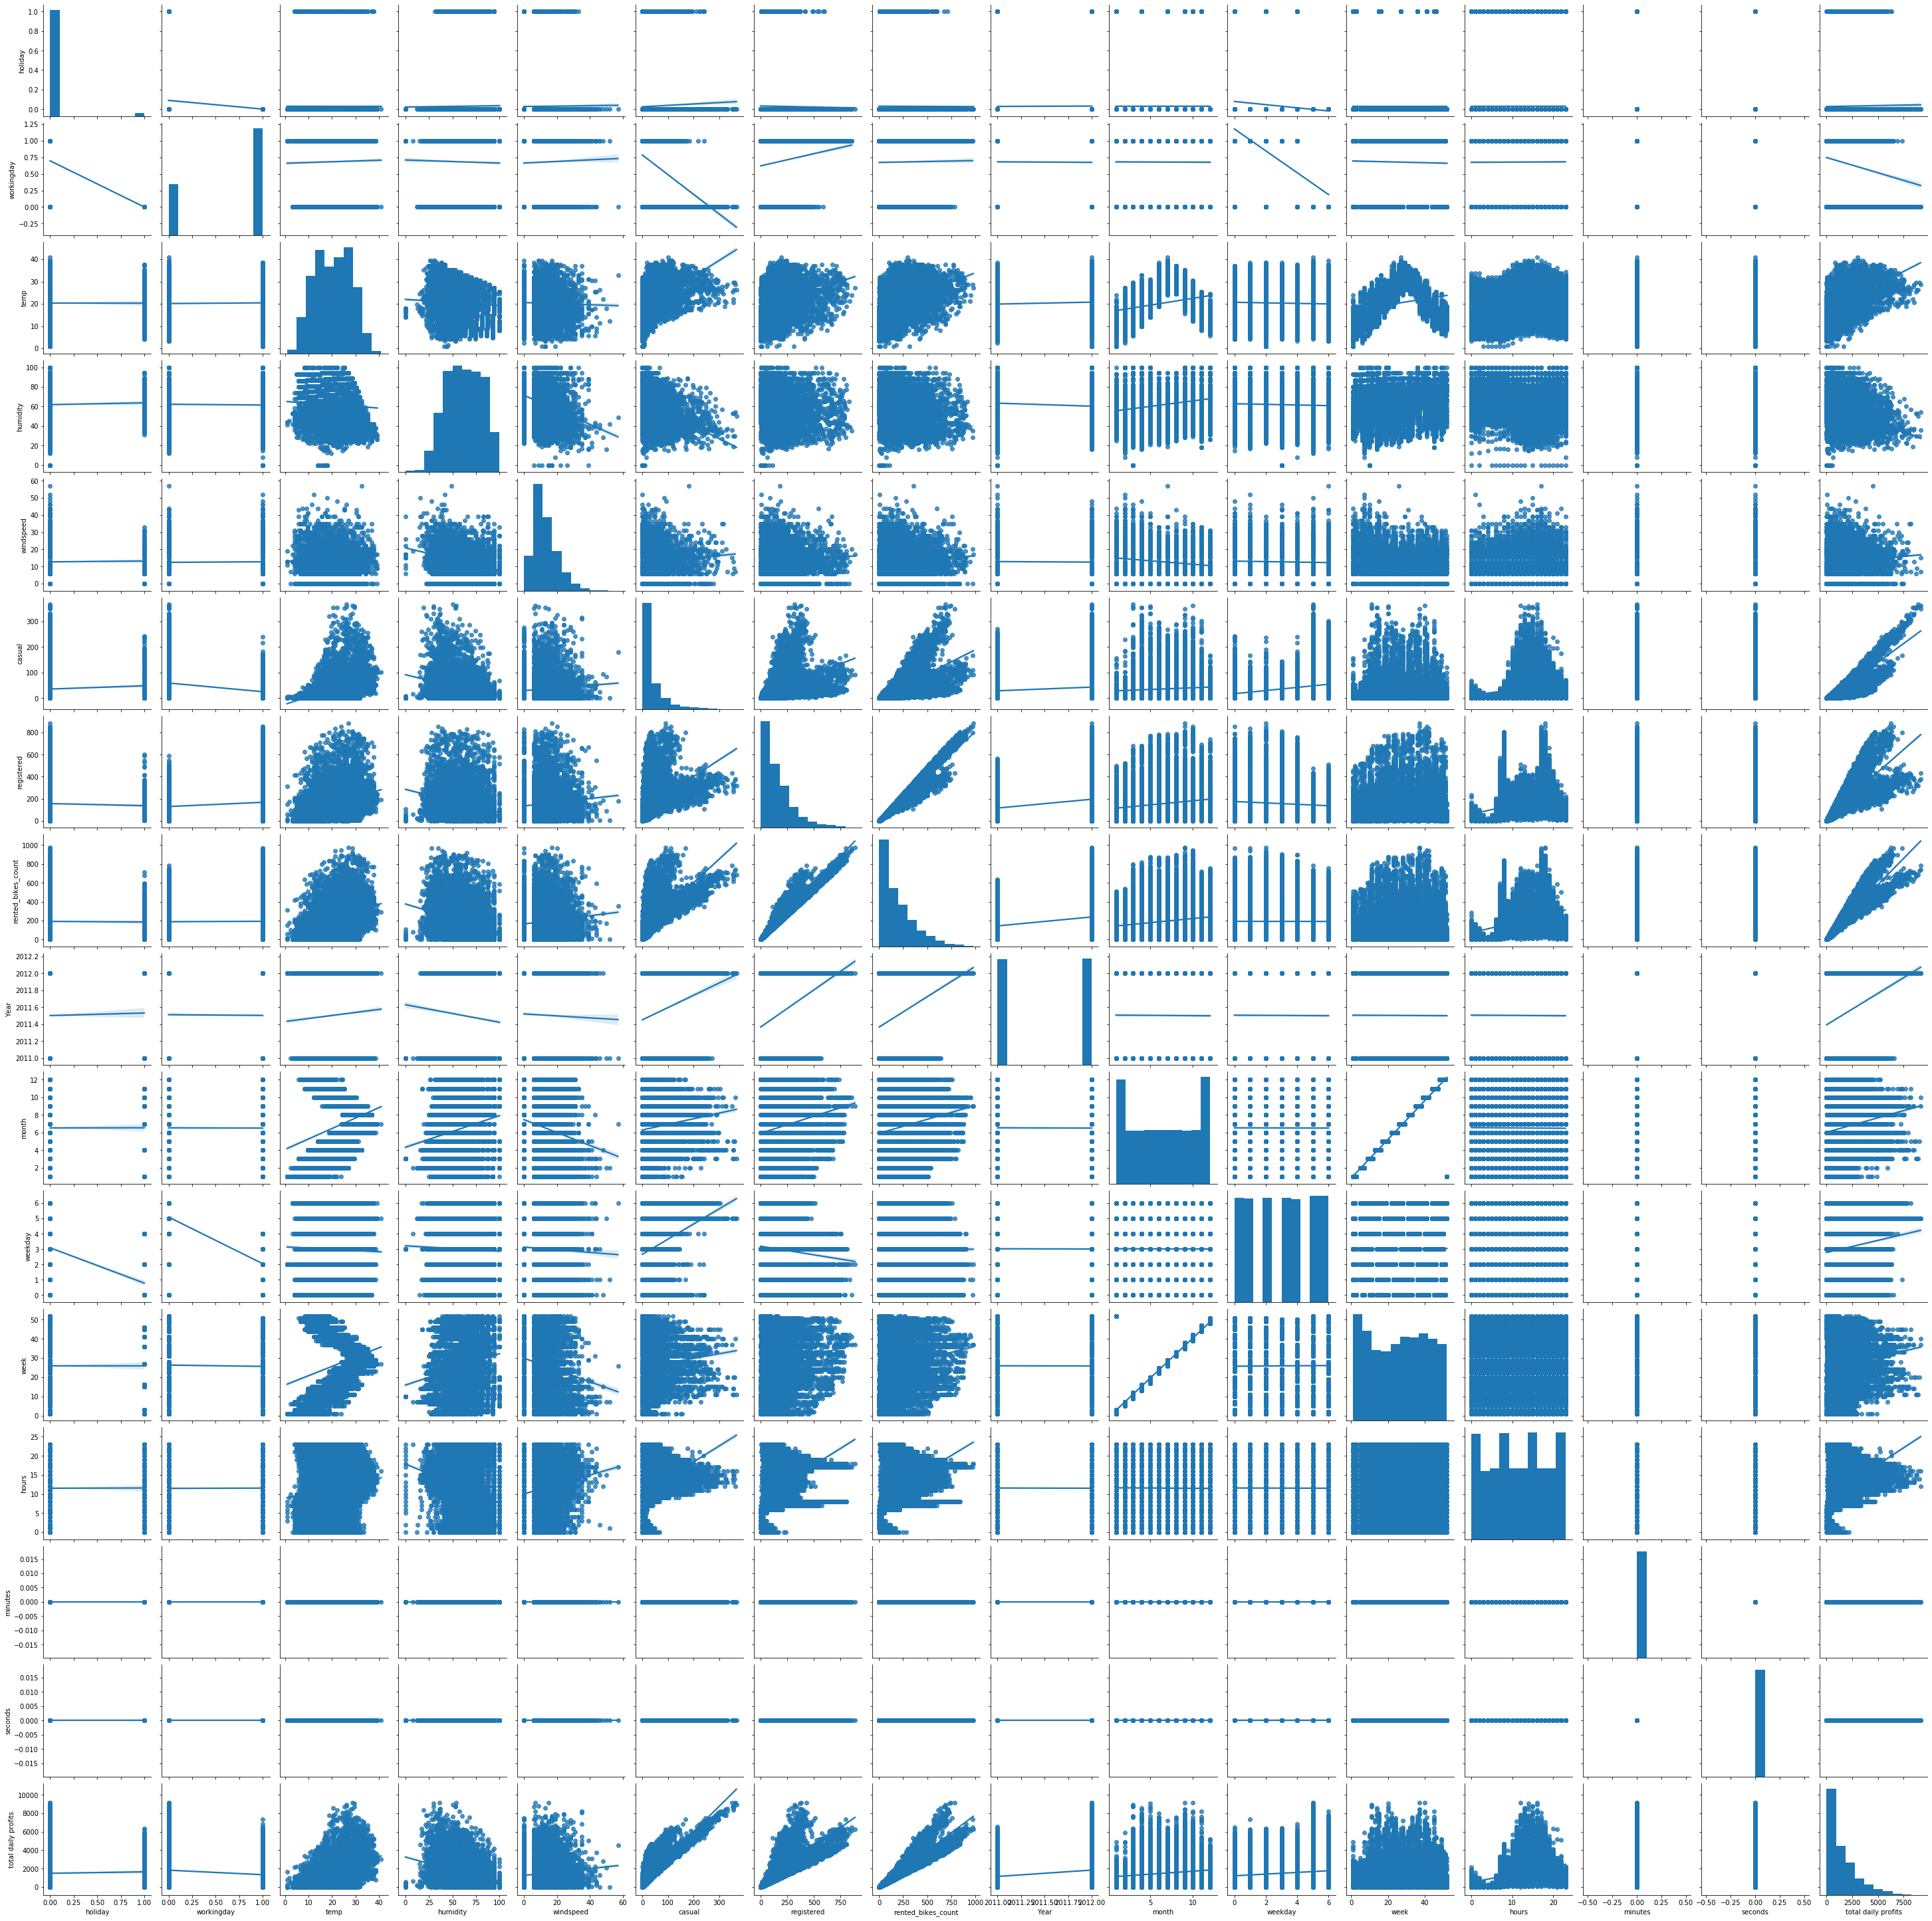

In [147]:
sns.pairplot(df, kind='reg')
plt.show()

In [19]:
df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
df["Year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["Month name"]=df["datetime"].dt.month_name()
df["weekday"]=df["datetime"].dt.weekday
df["week"]=df["datetime"].dt.week
df["day name"]=df["datetime"].dt.day_name()
df["hours"]=df["datetime"].dt.hour
df["minutes"]=df["datetime"].dt.minute
df["seconds"] =df["datetime"].dt.second

def daily_profits(X):
    tax_per_day = 0.14 / (365 * 24)
    maintance_per_day = 1500 / (365 * 24)
    registered_profits = X[0] * 5
    casual_profits = X[1] * 20
    total_day_profits = (casual_profits + registered_profits) - maintance_per_day
    daily_profit = total_day_profits - (total_day_profits * tax_per_day)
    return daily_profit
    
df["total daily profits"] = df[["registered", "casual"]].apply(daily_profits, axis=1)
df.head(1)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,...,Year,month,Month name,weekday,week,day name,hours,minutes,seconds,total daily profits
0,2011-01-01,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,...,2011,1,January,5,52,Saturday,0,0,0,124.826772


# Data Visualization

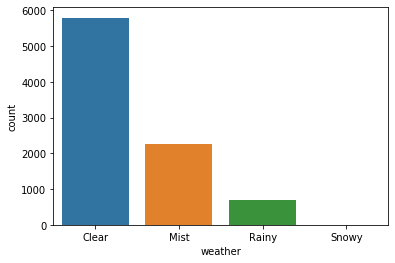

In [29]:
sns.countplot(df["weather"])
plt.show()

In [ ]:
sns.countplot(y = df["day name"], hue=df["weather"])

**The most rental bike in wheather mode is <span style="color:blue">'Clear'</span>**

**Most of the data tend to clear weather**

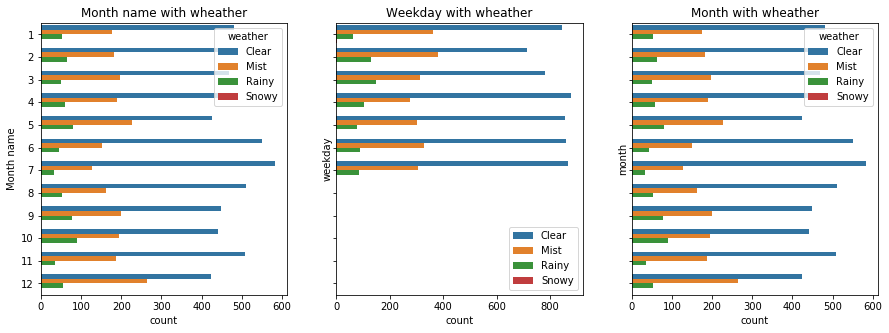

In [46]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5), sharey=True)

plt.sca(ax[0])
sns.countplot(y = df['Month name'], hue=df["weather"])
plt.title("Month name with wheather")

plt.sca(ax[1])
sns.countplot(y = df["weekday"], hue=df["weather"])
plt.title("Weekday with wheather")
plt.legend(loc="lower right")

plt.sca(ax[2])
sns.countplot(y = df["month"], hue=df["weather"])
plt.title("Month with wheather")

plt.show()

**The most registered biker is when wheather is clear > Mist > Rainy, and when its snowy there's no bike rental,
really if bike rental recorded daily so there\`s no reocrds to justify rental in Snowy wheather!**

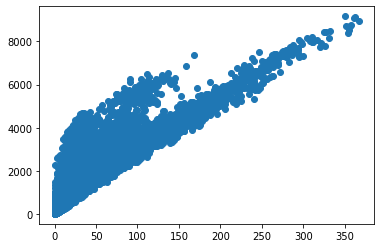

In [57]:
plt.scatter(df["casual"], df["total daily profits"])
# the correlation between causal and total daily profits is storngly correlated lets check the corrleation in code

In [62]:
# as we anvastigeted in graph
df.corr()["casual"]["total daily profits"]

0.9027127299760909

0.8221563623154564

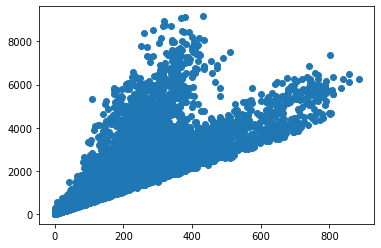

In [65]:
plt.scatter(df["registered"], df["total daily profits"])
df.corr()["registered"]["total daily profits"]

**Ok casuals are corrlated by 90% while registered corrlated by 82%: this means that more profit when causals rent our bike**

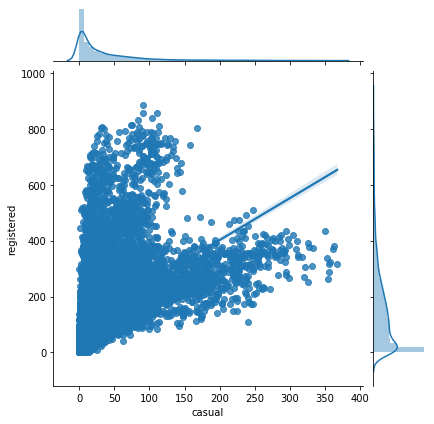

In [68]:
# sice the correlation between casual and registered not necessary
sns.jointplot(df["casual"], df["registered"], kind="reg")
plt.show()

## Identifiying correlation between features using heatmap

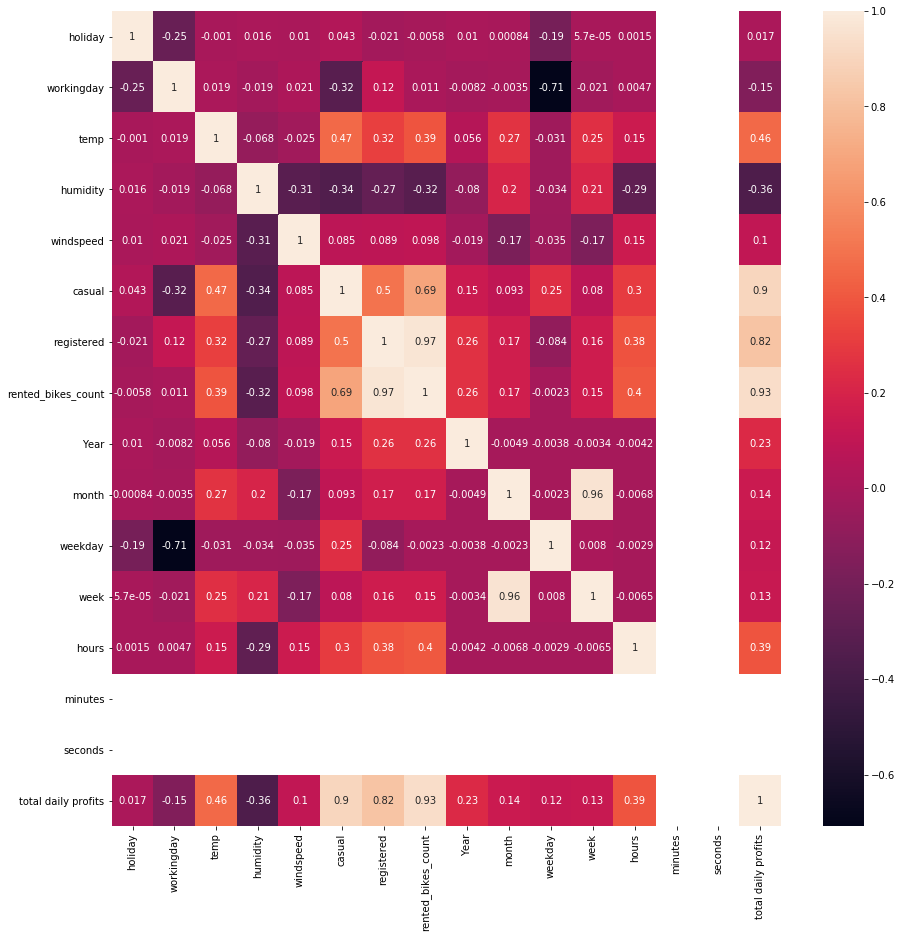

In [88]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()

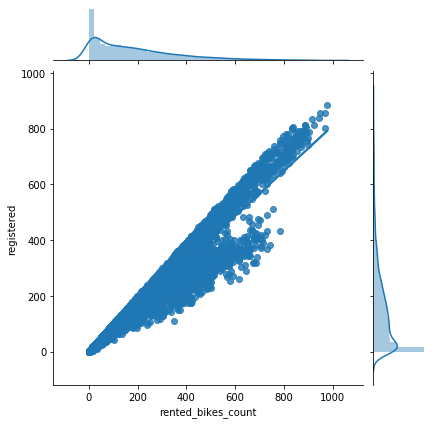

In [268]:
sns.jointplot(df["rented_bikes_count"], df["registered"], kind="reg")
plt.show()

**As we can see here**

- registered and casual are srongley correlated with rental bike counts.
- rental bike counts correlated with total profits.
- causal strongly correlated with total profits than registered.
- Month with Week!

**<span style="color:orange">Note:</span>There is nuecessary correlation.**

**We have strong  <span style="color:red">negative</span> correlation between weekday and working day.**

- beacause of the binary values!

In [99]:
print(df["weekday"].value_counts())
print(df["workingday"].value_counts())

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: weekday, dtype: int64
1.0    6367
0.0    3021
Name: workingday, dtype: int64


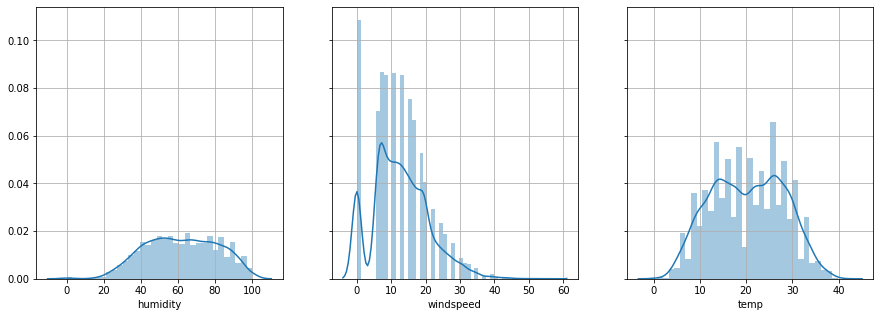

In [184]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5), sharey=True)
plt.sca(ax[0])
sns.distplot(df["humidity"])
plt.grid(True)

plt.sca(ax[1])
sns.distplot(df["windspeed"])
plt.grid(True)

plt.sca(ax[2])
sns.distplot(df["temp"])
plt.grid(True)
plt.show()

## Identifying outliers

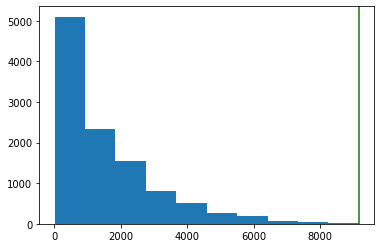

In [153]:
max_profit = df["total daily profits"].max()

plt.axvline(max_profit, color="g")
plt.hist(df["total daily profits"])
plt.show()
# total best profits lying on its histogram
# seemde to be an outlier right! since the histogram skewed right

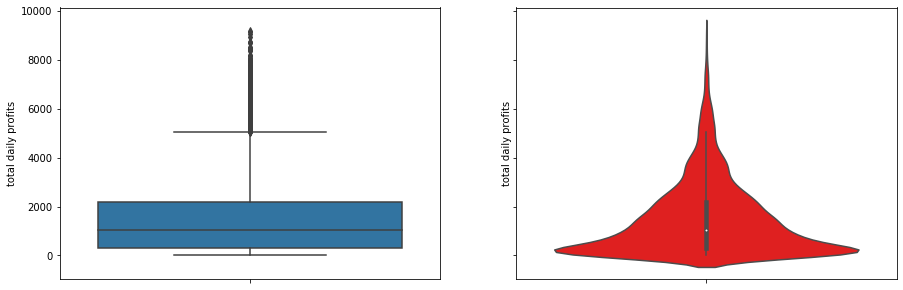

In [248]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5), sharey=True)
plt.sca(ax[0])
sns.boxplot(y = df["total daily profits"])

plt.sca(ax[1])
sns.violinplot(y = df["total daily profits"], color='red')

plt.show()
# see how to identify outliers. ->see (mean, mode) of violintplot

**Maximum profits that occured is an outlier**